In [15]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# Making faces transparent in images


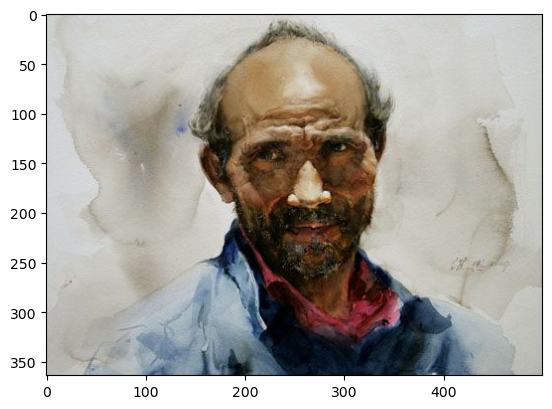

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('D:/images.jpeg')
plt.imshow(image[...,::-1])

if image is None:
    print("تصویر پیدا نشد! مسیر رو چک کن:", image_path)
    exit()

In [26]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


The file is saved in this path: C:\Users\Matin\class.vision-master


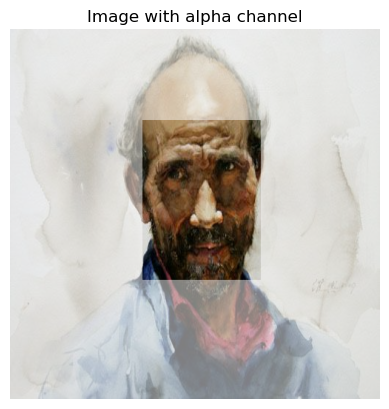

تصویر با موفقیت به اسم 'output.png' ذخیره شد!
حجم فایل: 0.45 MB


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from mtcnn import MTCNN
# 2. تغییر اندازه تصویر برای کنترل حجم و کار راحت‌تر
height, width = image.shape[:2]
image = cv2.resize(image, (500, 500))  # اندازه 500x500 برای حجم کم

# 3. تشخیص چهره با MTCNN
detector = MTCNN()
faces = detector.detect_faces(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if not faces:
    print("No face detected! I'm using a default circular mask.")
    # اگه چهره پیدا نشد، یه دایره پیش‌فرض می‌ذارم
    mask = np.zeros((500, 500), np.uint8)
    cv2.circle(mask, (250, 250), 150, 255, -1)
else:
    # ایجاد ماسک برای چهره‌های تشخیص‌داده‌شده
    mask = np.zeros((500, 500), np.uint8)
    for face in faces:
        x, y, w, h = face['box']
        # تنظیم مختصات برای جلوگیری از خارج شدن از تصویر
        x = max(0, x)
        y = max(0, y)
        w = min(w, 500 - x)
        h = min(h, 500 - y)
        cv2.rectangle(mask, (x, y), (x+w, y+h), 255, -1)

# 4. تبدیل تصویر به فرمت BGRA (4 کاناله)
bgr_image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

# 5. اعمال کانال آلفا
alpha_channel = np.zeros((500, 500), np.uint8)
alpha_channel[mask == 255] = 255  # ناحیه چهره کاملاً غیرشفاف
alpha_channel[mask == 0] = 128    # ناحیه غیرچهره نیمه‌شفاف (برای شفاف کامل 0 بذار)
bgr_image[:, :, 3] = alpha_channel

# 6. نمایش مسیر ذخیره‌سازی
print("The file is saved in this path:", os.getcwd())

# 7. نمایش تصویر قبل از ذخیره توی ژوپیتر
image_rgb = cv2.cvtColor(bgr_image, cv2.COLOR_BGRA2RGBA)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Image with alpha channel")
plt.show()

# 8. ذخیره تصویر به فرمت PNG
output_path = 'output.png'
cv2.imwrite(output_path, bgr_image)
print(f"تصویر با موفقیت به اسم '{output_path}' ذخیره شد!")

# 9. بررسی حجم فایل (اختیاری)
file_size = os.path.getsize(output_path) / (1024 * 1024)  # اندازه به مگابایت
print(f"حجم فایل: {file_size:.2f} MB")
if file_size > 10:
    print("حجم فایل بیشتر از 10 مگابایته! رزولوشن رو کم کن.")